<a href="https://colab.research.google.com/github/TanmayeeKolli/Drug-Discovery-Model-Ovarian-Cancer/blob/main/Drug_Discovery_For_Ovarian_Cancer_Part_2_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computational Drug Discovery for Ovarian Cancer [Part 2] Exploratory Data Analysis**

*Tanmayee Kolli*



In **Part 2**, I performed Descriptor Calculation and Exploratory Data Analysis.


Reference: *'Data Professor'*  YouTube channel (http://youtube.com/dataprofessor) by Chanin Nantasenamat


## **Installing conda and rdkit**
I installed miniconda and rdkit. Miniconda is run in batch mode to avoid prompts for installation, and Conda is used to download rdkit. I used rdkit to analyze the SMILES, which is the chemical structure of the molecules, that we saved in part one to generate molecular descriptors in this part.

In [49]:
%%capture
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh -q
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y -q
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [5]:
!pip install rdkit

     |████████████████████████████████| 29.5 MB 1.3 MB/s 


## **Loaded bioactivity data**

In [1]:
import pandas as pd

Accessed my previously saved 'bioactivity_preprocessed_data.csv' file from Part 1 through my Goodle Drive. Used Pandas to read the csv and saved is as 'data'.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Drug Discovery Ovarian Cancer project/data/bioactivity_preprocessed_data.csv')
data.head(3)

Mounted at /content/gdrive/


,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL521686,O=C(c1cc(Cc2n[nH]c(=O)c3ccccc23)ccc1F)N1CCN(C(...,active,1.0
1,CHEMBL558845,O=C1NCCc2c1ccc1[nH]cc(CCNC(=O)N3CCNCC3)c21,active,32.0
2,CHEMBL560790,O=C1NCCc2c1ccc1[nH]cc(CCNC(=O)N3CCCNCC3)c21,active,17.0


## **Calculate Lipinski descriptors**
"Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. In other words, it tells us how the molecule will be absorbed by the body, how it will be distributed to proper tissues and organs, and be excreted from the body. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**."
-- Nantasenamat

The Lipinski's Rule states the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [6]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**


The following code creates a rdkit Mol object as part of the Mol class for each element in the SMILES notation from "data" and stores it in the moldata list. The Mol objects represent the molecular structure of that compound. Afterwards, the Lipinski Descriptors are found using each Mol instance.



In [7]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation
# Code is from Nantasenamat's tutorial
# Code was modified to include the descriptors

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata: #this finds the descriptors and Lipinski values using molecular weight found above

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,     #arranging the descriptors in an array
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row]) #this stacks the next row under the existing rows, lengthening the list one molecule at a time
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [8]:
data_lipinski = lipinski(data.canonical_smiles) #applying the lipinski method from above

### **Combine DataFrames**

We will combine the data frames "data", which containes our pre-process bioactivity data, and "data_lipinski", which contains the molecules' Lipinski Factors, which include molecular weight, Octonal-water partition coefficient (LogP), Hydrogen bond donors, and Hydrogen bond acceptors.

In [11]:
data_lipinski.head(4)

,MW,LogP,NumHDonors,NumHAcceptors
0,434.471,2.3474,1.0,4.0
1,341.415,0.6111,4.0,3.0
2,355.442,1.0012,4.0,3.0
3,307.353,1.4935,1.0,3.0


In [12]:
data.head(4)

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL521686,O=C(c1cc(Cc2n[nH]c(=O)c3ccccc23)ccc1F)N1CCN(C(...,active,1.0
1,CHEMBL558845,O=C1NCCc2c1ccc1[nH]cc(CCNC(=O)N3CCNCC3)c21,active,32.0
2,CHEMBL560790,O=C1NCCc2c1ccc1[nH]cc(CCNC(=O)N3CCCNCC3)c21,active,17.0
3,CHEMBL595018,O=C1NCC2c3c(cccc31)CCN2C(=O)Cc1cccnc1,active,1.0


Combining the 2 DataFrames

In [13]:
combined_data = pd.concat([data,data_lipinski], axis=1)

In [14]:
combined_data.head(4)

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL521686,O=C(c1cc(Cc2n[nH]c(=O)c3ccccc23)ccc1F)N1CCN(C(...,active,1.0,434.471,2.3474,1.0,4.0
1,CHEMBL558845,O=C1NCCc2c1ccc1[nH]cc(CCNC(=O)N3CCNCC3)c21,active,32.0,341.415,0.6111,4.0,3.0
2,CHEMBL560790,O=C1NCCc2c1ccc1[nH]cc(CCNC(=O)N3CCCNCC3)c21,active,17.0,355.442,1.0012,4.0,3.0
3,CHEMBL595018,O=C1NCC2c3c(cccc31)CCN2C(=O)Cc1cccnc1,active,1.0,307.353,1.4935,1.0,3.0


### **Convert IC50 to pIC50**
"To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column"

-- Nantasenamat


By working with pIC50 values, we are able to compress wide-range values and improve data interpretation. pIC50 represents the potency of a drug, measured as the concentration required to inhibit 50% of a target. A higher pIC50 value corresponds to a more potent drug.

In [15]:
# Code source: https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

"Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative."

-- Nantasenamat

Before converting the IC50 data to the negative logarithmic scale, we will normalize the data by initializing an empty set, "norm". It iterates through "standard value" and if over 100,000,000, it caps it at 100,000,000 and is appended to the list. The new standard_value_norm list is appended to the data frame and the old standard_value column is dropped.

In [19]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

We normalize the df_combined data frame before converting the IC50 values to pIC50.

In [22]:
df_norm = norm_value(combined_data)
df_norm.head(4)

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL521686,O=C(c1cc(Cc2n[nH]c(=O)c3ccccc23)ccc1F)N1CCN(C(...,active,434.471,2.3474,1.0,4.0,1.0
1,CHEMBL558845,O=C1NCCc2c1ccc1[nH]cc(CCNC(=O)N3CCNCC3)c21,active,341.415,0.6111,4.0,3.0,32.0
2,CHEMBL560790,O=C1NCCc2c1ccc1[nH]cc(CCNC(=O)N3CCCNCC3)c21,active,355.442,1.0012,4.0,3.0,17.0
3,CHEMBL595018,O=C1NCC2c3c(cccc31)CCN2C(=O)Cc1cccnc1,active,307.353,1.4935,1.0,3.0,1.0


In [37]:
df_final = pIC50(df_norm) #this converts the IC50 values to pIC50 and drops standard_value_norm
df_final.to_csv('bioactivity_data_with_intermediates_PARP.csv', index=False) #creating a csv of the data with intermediate bioactivity
df_final.head(4)

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL521686,O=C(c1cc(Cc2n[nH]c(=O)c3ccccc23)ccc1F)N1CCN(C(...,active,434.471,2.3474,1.0,4.0,9.000000
1,CHEMBL558845,O=C1NCCc2c1ccc1[nH]cc(CCNC(=O)N3CCNCC3)c21,active,341.415,0.6111,4.0,3.0,7.494850
2,CHEMBL560790,O=C1NCCc2c1ccc1[nH]cc(CCNC(=O)N3CCCNCC3)c21,active,355.442,1.0012,4.0,3.0,7.769551
3,CHEMBL595018,O=C1NCC2c3c(cccc31)CCN2C(=O)Cc1cccnc1,active,307.353,1.4935,1.0,3.0,9.000000


### **Removing the 'intermediate' bioactivity class**
We removed the ``intermediate`` class from the data set.

In [36]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class.to_csv('bioactivity_data_no_intermediates_PARP.csv', index=False)
df_2class.head(4)

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL521686,O=C(c1cc(Cc2n[nH]c(=O)c3ccccc23)ccc1F)N1CCN(C(...,active,434.471,2.3474,1.0,4.0,9.000000
1,CHEMBL558845,O=C1NCCc2c1ccc1[nH]cc(CCNC(=O)N3CCNCC3)c21,active,341.415,0.6111,4.0,3.0,7.494850
2,CHEMBL560790,O=C1NCCc2c1ccc1[nH]cc(CCNC(=O)N3CCCNCC3)c21,active,355.442,1.0012,4.0,3.0,7.769551
3,CHEMBL595018,O=C1NCC2c3c(cccc31)CCN2C(=O)Cc1cccnc1,active,307.353,1.4935,1.0,3.0,9.000000


---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

We will import seaborn and matplotlib for data visualization.

Matplotlib allows us to create plots, graphs, charts, etc. Matplotlib.pyplot allows access of a MATLAB-like interface and is used to make simple plots and figures.

Seaborn allows us to create more complex plots and works well with Pandas Dataframes.

In [27]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

After creating a bar plot using seaborn, we can see that there are many more active than inactive compounds.

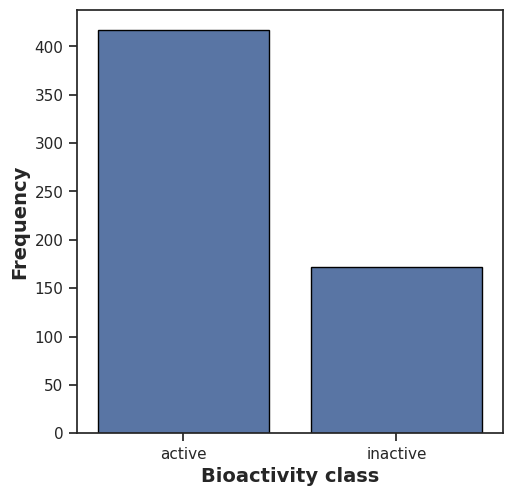

In [29]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

We created a scatterplot comparing the LogP with MW. The two different bioactivity classes have distinct colors and the sizes of each point corresponds to the pIC50 value. Alpha=7 sets the transparency of the points. The data shows the active and inactive points are clustered around a MW of 300 to 500 g/mol and 1 to 4 LogP.

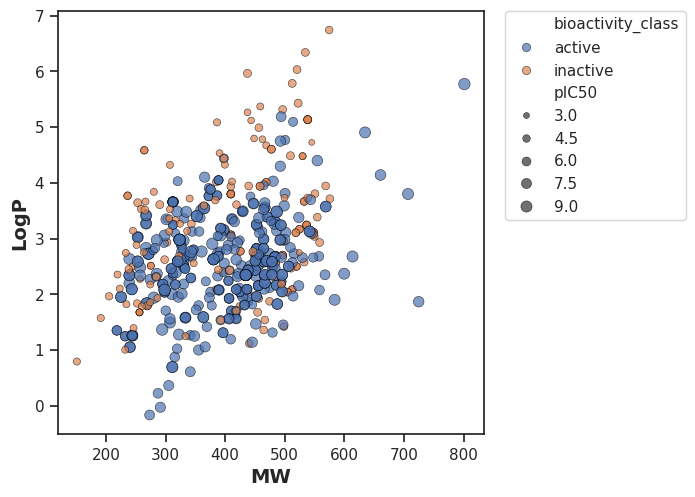

In [31]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

We use a boxplot to see the distribution of pIC50 values across the different bioactivity classes. It is clear that for active compounds, the pIC50 is higher than for the inactive compounds with a value of around 7.7 as the median.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


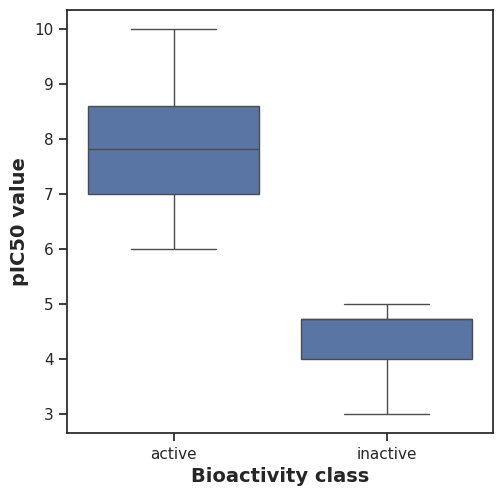

In [32]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

A Mann-Whitney U Tests to see if there are **significant differences** between the distributions of two indpendent datasets. This test compares the distributions of a specified descriptor for **active** and **inactive** compounds, where the descriptor can be set to our **different Lipinski Factors**. When the test is performed, we obtain a p value. If it is below 0.05, we reject the null hypothesis (H0). If it is over, we fail to reject H0.

If we find significant differences in the specified Lipinski factor between active and inactive compounds, that could mean there is an **association** between that factor and the drug's efficacy. However, it does not confirm a causal relationship, for which further tests must be done.

This code was obtained at: https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

In [38]:
def mannwhitney(descriptor, verbose=False):
  #

  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [39]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,71724.0,2.042614e-81,0.05,Different distribution (reject H0)


We got a lower p value than 0.05, meaning we reject the null. This indicates a possible association between pIC50 values and bioactivity!

#### **MW**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


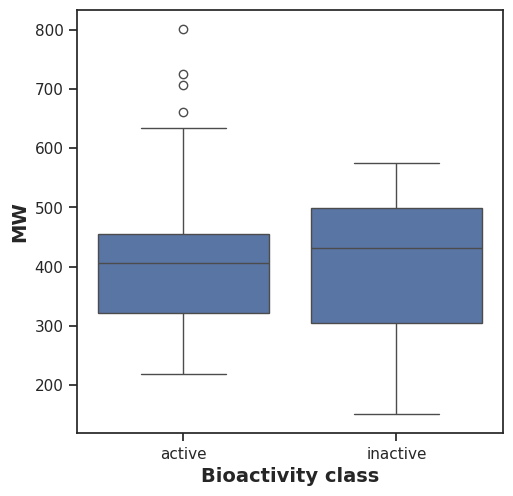

In [40]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

Visually, there seems to not be much difference between the medians of each bioactivity class when comparing their MW.

In [41]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,31449.5,0.018794,0.05,Different distribution (reject H0)


However, our Mann-Whitney test says otherwise, indicating significant difference between the classes. This discrepancy can occur because of **overlapping distributions** where the medians may appear equal but the overall distribution is varied. It is also apparent in the boxplot that the active group has many **outliers**, which may affect the results.

#### **LogP**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


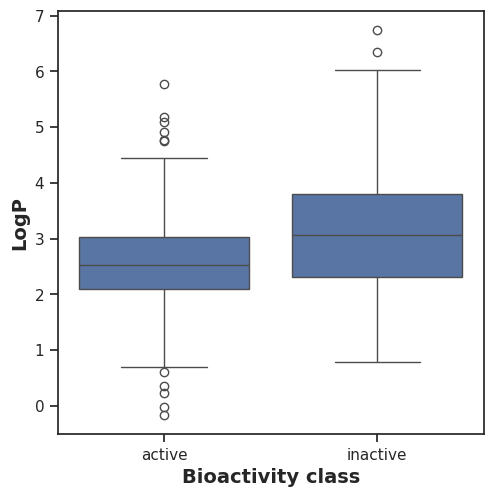

In [42]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [43]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,25822.0,8.968713e-08,0.05,Different distribution (reject H0)


There are also significant differences in LogP when comparing between active and inactive compounds.

#### **NumHDonors**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


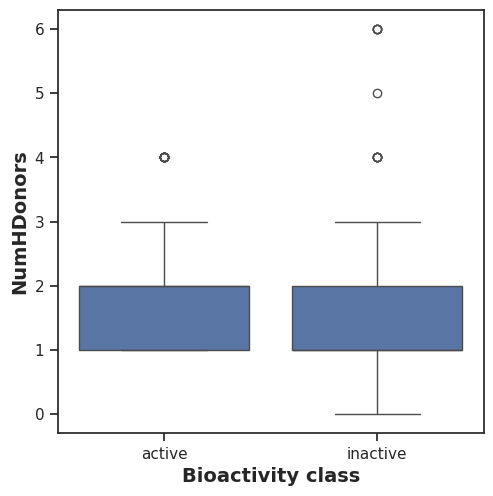

In [44]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [45]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,50000.5,6.089808e-16,0.05,Different distribution (reject H0)


The many outliers in the inactive bioactivity may be affecting the results here as well.

#### **NumHAcceptors**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


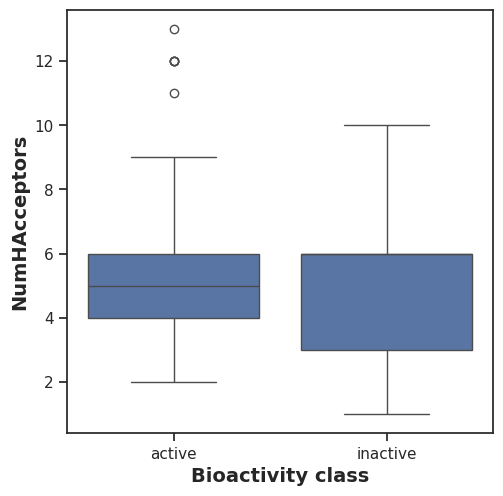

In [46]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [47]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,31910.5,0.032772,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**


###### **Lipinski's descriptors**

All 5 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors, pIC50) showed ***statistically significant difference*** between **actives** and **inactives**.